In [1]:
%run setup.ipynb

Path setup complete.


In this tutorials, we assess the impact of a well opening or closure on the non-linear solver 

## Set up initial problem

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import yads.mesh as ym
from yads.numerics.schemes import solss
from yads.wells import Well

In [11]:
# Define grid
grid = ym.two_D.create_2d_cartesian(Lx=21, Ly=5, Nx=21, Ny=5)

In [12]:
# Properties 
# Porosity
phi = np.full(grid.nb_cells, 0.2)
# Diffusion coefficient (i.e Permeability)
K = np.full(grid.nb_cells, 100.0e-15)
# viscosity
mu_w = 0.571e-3
mu_g = 0.0285e-3
# Relative permeability model: only 'cross' (kr(s) = s) and 'quadratic' (kr(s) = s**2) are supported 
kr_model = "quadratic"

In [13]:
# BOUNDARY CONDITIONS #
# Pressure
# Small pressure gradient from left to right
Pb = {"left": 110.0e5,  "right": 100.0e5}
# Saturation
# Inject gaz from left to right through Dirichlet boundary conditions
Sb_d = {"left": 1.0, "right": 0.0}
# No Neumann so we create a dict of None
Sb_n = {"left": None, "right": None}
Sb_dict = {"Dirichlet": Sb_d, "Neumann": Sb_n}

In [14]:
total_sim_time = 1000
dt = 100

In [39]:
# gaz saturation initialization: Only water at first 
S = np.full(grid.nb_cells, 0.0)
# Pressure initialization: Initial pressure guess, does matter a lot ! 
P = np.full(grid.nb_cells, 100.0e5)

newton_list_no_well, dt_list_no_well = solss(
        grid=grid,
        P=P,
        S=S,
        Pb=Pb,
        Sb_dict=Sb_dict,
        phi=phi,
        K=K,
        mu_g=mu_g,
        mu_w=mu_w,
        dt_init=dt,
        total_sim_time=total_sim_time,
        kr_model=kr_model,
        wells=[],
        max_newton_iter=20,
        eps=1e-6
    )

step: 1 done in 0.0231 seconds with dt=1.000E+02s
step: 2 done in 0.0082 seconds with dt=1.000E+02s
step: 3 done in 0.0081 seconds with dt=1.000E+02s
step: 4 done in 0.0073 seconds with dt=1.000E+02s
step: 5 done in 0.0075 seconds with dt=1.000E+02s
step: 6 done in 0.0082 seconds with dt=1.000E+02s
step: 7 done in 0.0072 seconds with dt=1.000E+02s
step: 8 done in 0.0111 seconds with dt=1.000E+02s
step: 9 done in 0.0037 seconds with dt=1.000E+02s
step: 10 done in 0.0044 seconds with dt=1.000E+02s
total simulation time:  1000.0
--- 0.09450697898864746 seconds ---


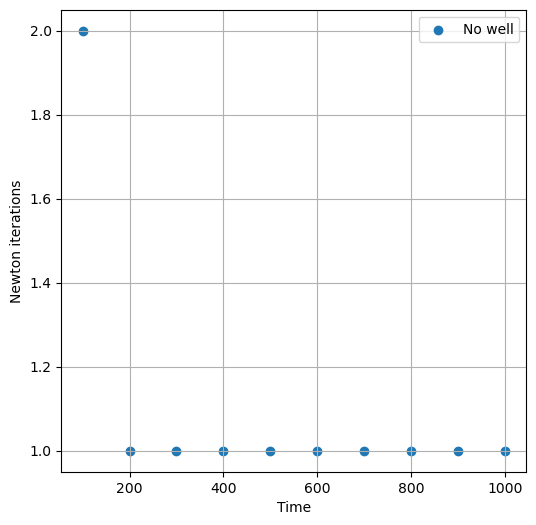

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.grid(True)
ax.scatter(np.cumsum(dt_list_no_well), newton_list_no_well, label='No well')
ax.set_xlabel('Time')
ax.set_ylabel('Newton iterations')
plt.legend()
plt.show()

In [35]:
# Create a well in the middle of the domain which inject from 200 to 600 seconds 
# The well inject with a slightly higher pressure than the reservoir presssure
well = Well(
    name="well",
    cell_group=np.array([[10.5, 2.5]]),
    radius=0.1,
    control={"Dirichlet": 110.0e5},
    s_inj=1.0,
    schedule=[
        [200, 600],
    ],
    mode="injector",
)

In [36]:
# gaz saturation initialization: Only water at first 
S = np.full(grid.nb_cells, 0.0)
# Pressure initialization: Initial pressure guess, does matter a lot ! 
P = np.full(grid.nb_cells, 100.0e5)

newton_list_well, dt_list_well = solss(
        grid=grid,
        P=P,
        S=S,
        Pb=Pb,
        Sb_dict=Sb_dict,
        phi=phi,
        K=K,
        mu_g=mu_g,
        mu_w=mu_w,
        dt_init=dt,
        total_sim_time=total_sim_time,
        kr_model=kr_model,
        wells=[well],
        max_newton_iter=20,
        eps=1e-6
    )

step: 1 done in 0.0776 seconds with dt=1.000E+02s
step: 2 done in 0.0082 seconds with dt=1.000E+02s
step: 3 done in 0.0161 seconds with dt=1.000E+02s
step: 4 done in 0.0118 seconds with dt=1.000E+02s
step: 5 done in 0.0087 seconds with dt=1.000E+02s
step: 6 done in 0.0136 seconds with dt=1.000E+02s
step: 7 done in 0.0087 seconds with dt=1.000E+02s
step: 8 done in 0.0037 seconds with dt=1.000E+02s
step: 9 done in 0.0040 seconds with dt=1.000E+02s
step: 10 done in 0.0047 seconds with dt=1.000E+02s
total simulation time:  1000.0
--- 0.16186285018920898 seconds ---


During the well event, the number of Newton iterations required to converge is increased from 1 (No well case) to 2. The two main factors that drives the impact of this event are the time step dt and the well injection flow rate or the imposed pressure at the well location. 

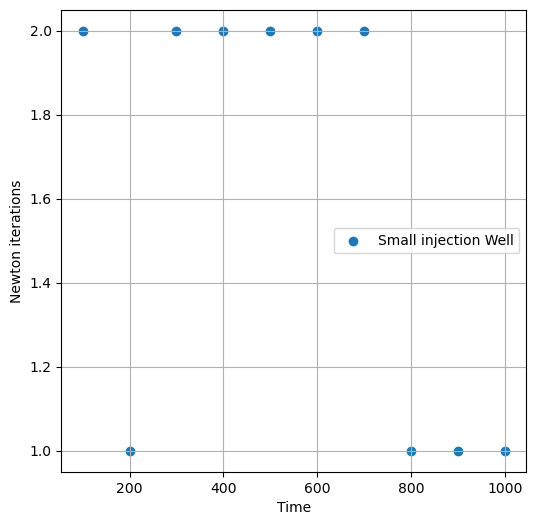

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.grid(True)
ax.scatter(np.cumsum(dt_list_well), newton_list_well, label='Small injection Well')
ax.set_xlabel('Time')
ax.set_ylabel('Newton iterations')
plt.legend()
plt.show()

In [43]:
well = Well(
    name="well",
    cell_group=np.array([[10.5, 2.5]]),
    radius=0.1,
    control={"Dirichlet": 200.0e5},
    s_inj=1.0,
    schedule=[
        [200, 600],
    ],
    mode="injector",
)

In [47]:
# gaz saturation initialization: Only water at first 
S = np.full(grid.nb_cells, 0.0)
# Pressure initialization: Initial pressure guess, does matter a lot ! 
P = np.full(grid.nb_cells, 100.0e5)

newton_list_strong_well, dt_list_strong_well = solss(
        grid=grid,
        P=P,
        S=S,
        Pb=Pb,
        Sb_dict=Sb_dict,
        phi=phi,
        K=K,
        mu_g=mu_g,
        mu_w=mu_w,
        dt_init=dt,
        total_sim_time=total_sim_time,
        kr_model=kr_model,
        wells=[well],
        max_newton_iter=20,
        eps=1e-6
    )

step: 1 done in 0.0811 seconds with dt=1.000E+02s
step: 2 done in 0.0079 seconds with dt=1.000E+02s
step: 3 done in 0.0294 seconds with dt=1.000E+02s
step: 4 done in 0.0150 seconds with dt=1.000E+02s
step: 5 done in 0.0110 seconds with dt=1.000E+02s
step: 6 done in 0.0148 seconds with dt=1.000E+02s
step: 7 done in 0.0097 seconds with dt=1.000E+02s
step: 8 done in 0.0084 seconds with dt=1.000E+02s
step: 9 done in 0.0094 seconds with dt=1.000E+02s
step: 10 done in 0.0070 seconds with dt=1.000E+02s
total simulation time:  1000.0
--- 0.1983029842376709 seconds ---


Right after the well opening, the number of Newton iterations required to converge increases to 6 and remains at 3 for the totality of the well opening. 

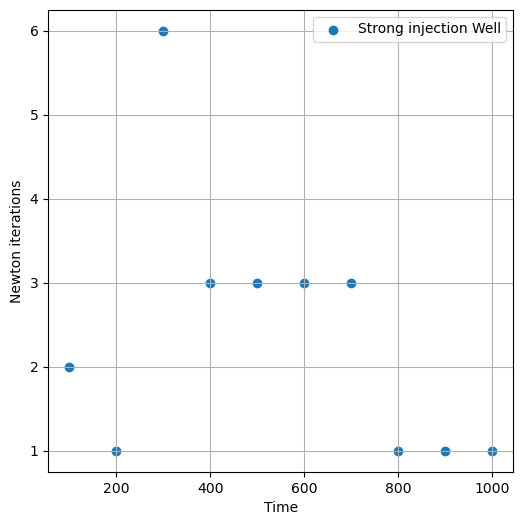

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.grid(True)
ax.scatter(np.cumsum(dt_list_strong_well), newton_list_strong_well, label='Strong injection Well')
ax.set_xlabel('Time')
ax.set_ylabel('Newton iterations')
plt.legend()
plt.show()